In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [50]:
train_df = pd.read_csv('housing_price_prediction/train.csv')
val_df = pd.read_csv('housing_price_prediction/validation.csv')  # for test set


In [51]:
train_df = pd.DataFrame(train_df)
val_df = pd.DataFrame(val_df)

In [52]:
train_df = train_df.drop('hotwaterheating',axis=1)
val_df = val_df.drop('hotwaterheating',axis=1)

In [53]:
# train_df.isnull().sum()

In [54]:
# val_df.isnull().sum()

In [55]:
# val_df.info()

In [56]:
# numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
# for feature in numerical_features:
#     plt.figure(figsize=(6, 3))
#     sns.histplot(train_df[feature], kde=True)
#     plt.title(f'Distribution of {feature} for training data')
#     plt.show()

In [57]:
# numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
# for feature in numerical_features:
#     plt.figure(figsize=(6, 3))
#     sns.histplot(val_df[feature], kde=True)
#     plt.title(f'Distribution of {feature} for validation data')
#     plt.show()

In [58]:
# # Plotting the distribution of categorical features
# categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# plt.figure(figsize=(14, 14))
# for i, feature in enumerate(categorical_features, 1):
#     plt.subplot(4, 2, i)
#     sns.countplot(x=feature, data=train_df, palette='viridis')
#     plt.title(f'Distribution of {feature}')
# plt.tight_layout()
# plt.show()


In [59]:
# Plotting the distribution of categorical features
# categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# plt.figure(figsize=(14, 14))
# for i, feature in enumerate(categorical_features, 1):
#     plt.subplot(4, 2, i)
#     sns.countplot(x=feature, data=val_df, palette='viridis')
#     plt.title(f'Distribution of {feature}')
# plt.tight_layout()
# plt.show()


In [60]:
# for category in categorical_features:
#     print(f"Number of unique values in {category} = {len(train_df[category].unique())}")

In [61]:
# for category in categorical_features:
#     print(f"Number of unique values in {category} = {len(val_df[category].unique())}")

In [62]:
# train_df_clean = train_df_clean.drop('hotwaterheating', axis=1)

In [63]:
numerical_features = train_df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = train_df.select_dtypes(include=['object']).columns

In [64]:
train_df_clean = pd.get_dummies(data=train_df,columns=categorical_features, drop_first=True)
train_df_clean

,area,bedrooms,bathrooms,stories,parking,price,mainroad_yes,guestroom_yes,basement_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,9800,4,2,2,2,5250000,True,True,False,False,False,True,False
1,6540,4,2,2,2,8540000,True,True,True,True,True,False,False
2,3520,2,1,2,0,4515000,True,False,False,False,True,False,False
3,8250,3,1,1,0,4480000,True,False,False,False,False,False,False
4,3180,4,1,2,0,3290000,True,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,3600,2,1,1,0,3675000,True,False,False,False,False,False,False
377,4320,3,1,2,2,4060000,True,False,False,False,True,False,False
378,1836,2,1,1,0,2275000,False,False,True,False,False,True,False
379,15600,3,1,1,2,5943000,True,False,False,True,False,True,False


In [65]:
val_df_clean = pd.get_dummies(data=val_df,columns=categorical_features, drop_first=True)
val_df_clean

,area,bedrooms,bathrooms,stories,parking,price,mainroad_yes,guestroom_yes,basement_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,3480,4,1,2,1,3290000,False,False,False,False,False,True,False
1,2015,3,1,2,0,3850000,True,False,True,False,True,True,False
2,5400,3,1,1,3,4025000,True,False,False,False,False,True,False
3,6000,3,2,4,1,7210000,True,True,False,True,False,False,False
4,2910,3,1,1,0,1750000,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,3600,2,1,1,0,3780000,True,False,False,False,False,True,False
78,6615,3,1,2,0,2940000,True,False,False,False,False,True,False
79,2640,2,1,1,1,2835000,False,False,False,False,False,False,False
80,4400,3,1,2,0,2485000,True,False,False,False,False,False,True


In [66]:

# Interaction feature: area * bedrooms
train_df_clean['area_bedrooms'] = train_df_clean['area'] * train_df_clean['bedrooms']

# Polynomial feature: area squared
# train_df_clean['area_squared'] = train_df_clean['area'] ** 2


train_df_clean['bathrooms_stories'] = train_df_clean['bathrooms'] * train_df_clean['stories']




train_df_clean['total_rooms'] = train_df_clean['bedrooms'] * train_df_clean['bathrooms']



# Interaction feature: area * bedrooms
val_df_clean['area_bedrooms'] = val_df_clean['area'] * val_df_clean['bedrooms']

# Polynomial feature: area squared
# val_df_clean['area_squared'] = val_df_clean['area'] ** 2

val_df_clean['bathrooms_stories'] = val_df_clean['bathrooms'] * val_df_clean['stories']



val_df_clean['total_rooms'] = val_df_clean['bedrooms'] * val_df_clean['bathrooms']





In [67]:
# numerical_features = train_df_clean.select_dtypes(include=['float64', 'int64']).columns
# categorical_features = train_df_clean.select_dtypes(include=['object']).columns
# for feature in numerical_features:
#     print(f"skewness of {feature} for train = {train_df_clean[feature].skew()}")
# print(" ")

# for feature in numerical_features:
    # print(f"skewness of {feature} for val = {val_df_clean[feature].skew()}")

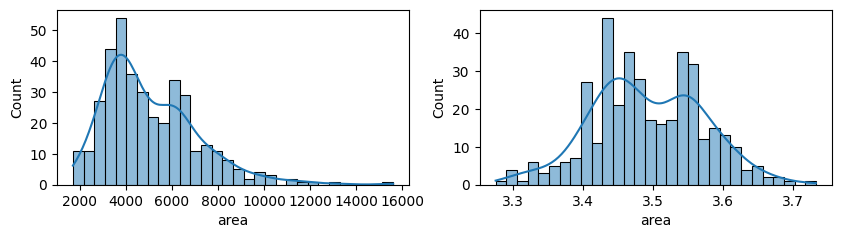

0.040458694488927305


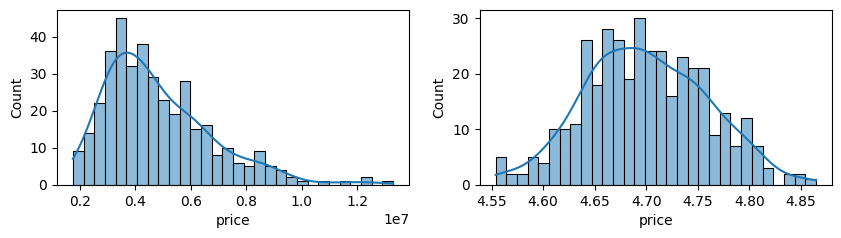

0.09374532807415344


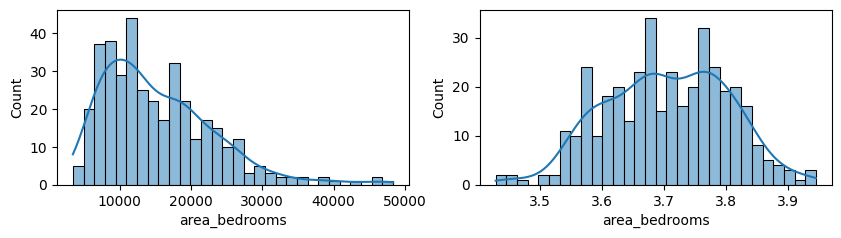

-0.10397918196191072


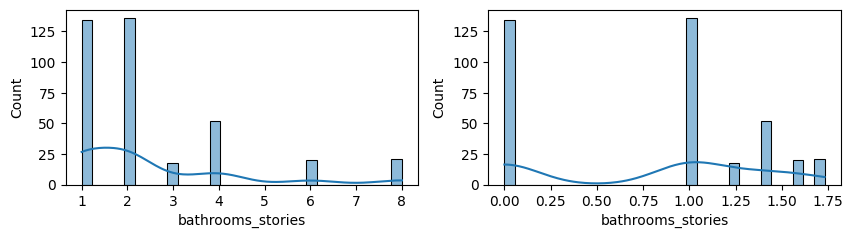

-0.2392797719979873


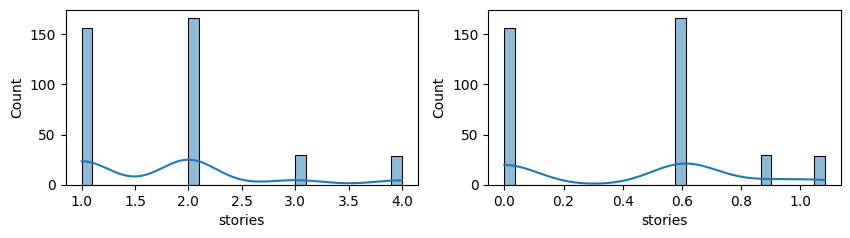

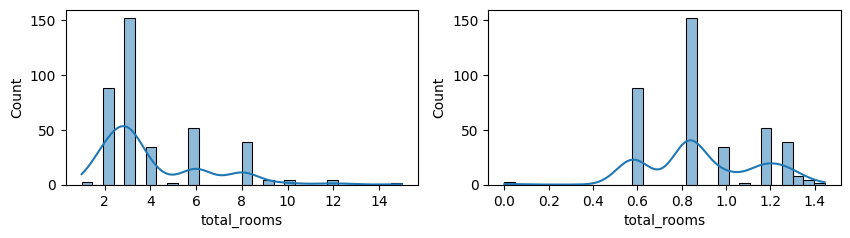

In [68]:
numerical_features = train_df_clean.select_dtypes(include=['float64', 'int64']).columns
categorical_features = train_df_clean.select_dtypes(include=['object']).columns

changes = ['area','price','area_bedrooms','bathrooms_stories']

for col in changes:

    plt.figure(figsize=(10, 5))
    plt.subplot(2,2,1)
    sns.histplot(data=train_df_clean[col], bins=30, kde=True)


    train_df_clean[col] = np.log2(train_df_clean[col])
    train_df_clean[col] = np.sqrt(train_df_clean[col])
 
    val_df_clean[col] = np.log2(val_df_clean[col])
    val_df_clean[col] = np.sqrt(val_df_clean[col])


    plt.subplot(2,2,2)
    sns.histplot(data=train_df_clean[col], bins=30, kde=True)
    plt.show()


    print(train_df_clean[col].skew())


changes1 = ['stories','total_rooms']

for col in changes1:
    plt.figure(figsize=(10, 5))
    plt.subplot(2,2,1)
    sns.histplot(data=train_df_clean[col], bins=30, kde=True)


    from scipy.stats import boxcox
    train_df_clean[col],fitted_lambda = boxcox(train_df_clean[col])
    val_df_clean[col] = boxcox(val_df_clean[col],fitted_lambda)

    plt.subplot(2,2,2)
    sns.histplot(data=train_df_clean[col], bins=30, kde=True)
    plt.show()



In [69]:
# for col in train_df_clean[numerical_features]:
#     sns.boxplot(data=train_df_clean[col])
#     plt.title(f'Boxplot of {col}')
#     plt.show()

In [70]:
# for col in val_df_clean[numerical_features]:
#     sns.boxplot(data=val_df_clean[col])
#     plt.title(f'Boxplot of {col}')
#     plt.show()

In [71]:
def calculate_z_scores(dfa, column):
    mean = dfa[column].mean()
    std_dev = dfa[column].std()
    z_scores = ((dfa[column] - mean) / std_dev).abs()
    return z_scores

columns_to_check = ['bedrooms','bathrooms_stories','parking']
threshold = 3
for column in columns_to_check:
    z_scores = calculate_z_scores(train_df_clean, column)
    train_df_clean = train_df_clean[z_scores < threshold]
    
for column in columns_to_check:
    z_scores = calculate_z_scores(val_df_clean, column)
    val_df_clean = val_df_clean[z_scores < threshold]

columns = ['bathrooms']
for column in columns:
    z_scores = calculate_z_scores(train_df_clean, column)
    train_df_clean = train_df_clean[z_scores < threshold]
    
for column in columns_to_check:
    z_scores = calculate_z_scores(val_df_clean, column)
    val_df_clean = val_df_clean[z_scores < threshold]
    



In [72]:
val_df_clean.head()

,area,bedrooms,bathrooms,stories,parking,price,mainroad_yes,guestroom_yes,basement_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,area_bedrooms,bathrooms_stories,total_rooms
0,3.429996,4,1,0.611048,1,4.652919,False,False,False,False,False,True,False,3.710104,1.000000,0.984924
1,3.313090,3,1,0.611048,0,4.677224,True,False,True,False,True,True,False,3.544224,1.000000,0.834910
2,3.521185,3,1,0.000000,3,4.684075,True,False,False,False,False,True,False,3.739479,0.000000,0.834910
3,3.542703,3,2,1.083300,1,4.773004,True,True,False,True,False,False,False,3.759749,1.732051,1.161359
4,3.392168,3,1,0.000000,0,4.554001,False,False,False,False,False,False,False,3.618255,0.000000,0.834910


In [73]:
# for feature in numerical_features:
#     print(f"skewness of {feature} for train = {train_df_clean[feature].skew()}")
# print(" ")
# for feature in numerical_features:
#     print(f"skewness of {feature} for val = {val_df_clean[feature].skew()}")

In [74]:
# # Visualization of bathrooms distribution
# fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
# sns.histplot(train_df_clean['bathrooms'], kde=True, ax=axes[0]).set_title('Training Set - Bathrooms')
# sns.histplot(val_df_clean['bathrooms'], kde=True, ax=axes[1]).set_title('Validation Set - Bathrooms')
# plt.show()

In [75]:
# Function to remove outliers
# def remove_outliers(df, features):
#     for feature in features:
#         Q1 = df[feature].quantile(0.25)
#         Q3 = df[feature].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
#     return df

In [76]:
# train_df_clean = remove_outliers(train_df_clean, ['area_parking'])
# val_df_clean = remove_outliers(val_df_clean, ['area_parking'])

In [77]:
train_df_clean = pd.DataFrame(train_df_clean)
val_df_clean = pd.DataFrame(val_df_clean)

In [78]:
train_df_clean.isnull().sum()

area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
price                              0
mainroad_yes                       0
guestroom_yes                      0
basement_yes                       0
airconditioning_yes                0
prefarea_yes                       0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
area_bedrooms                      0
bathrooms_stories                  0
total_rooms                        0
dtype: int64

In [79]:
val_df_clean.head()

,area,bedrooms,bathrooms,stories,parking,price,mainroad_yes,guestroom_yes,basement_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,area_bedrooms,bathrooms_stories,total_rooms
0,3.429996,4,1,0.611048,1,4.652919,False,False,False,False,False,True,False,3.710104,1.000000,0.984924
1,3.313090,3,1,0.611048,0,4.677224,True,False,True,False,True,True,False,3.544224,1.000000,0.834910
2,3.521185,3,1,0.000000,3,4.684075,True,False,False,False,False,True,False,3.739479,0.000000,0.834910
3,3.542703,3,2,1.083300,1,4.773004,True,True,False,True,False,False,False,3.759749,1.732051,1.161359
4,3.392168,3,1,0.000000,0,4.554001,False,False,False,False,False,False,False,3.618255,0.000000,0.834910


In [80]:
# train_df_clean = train_df_clean.drop('hotwaterheating',axis=1)
# val_df_clean = val_df_clean.drop('hotwaterheating',axis=1)

In [81]:
X_train = train_df_clean.drop('price', axis=1).values
y_train = train_df_clean['price'].values
print(f"Dimension of feature matrix: {X_train.shape}")
print(f"Dimension of label vector: {y_train.shape}")

Dimension of feature matrix: (371, 15)
Dimension of label vector: (371,)


In [82]:
X_val = val_df_clean.drop('price', axis=1).values
y_val = val_df_clean['price'].values
print(f"Dimension of feature matrix: {X_val.shape}")
print(f"Dimension of label vector: {y_val.shape}")

Dimension of feature matrix: (82, 15)
Dimension of label vector: (82,)


In [83]:
y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)

In [84]:
train_df_clean.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'airconditioning_yes',
       'prefarea_yes', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished', 'area_bedrooms', 'bathrooms_stories',
       'total_rooms'],
      dtype='object')

In [85]:
val_df_clean.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'airconditioning_yes',
       'prefarea_yes', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished', 'area_bedrooms', 'bathrooms_stories',
       'total_rooms'],
      dtype='object')

In [86]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
X_train_scaled = sscaler.fit_transform(X_train)
X_val_scaled = sscaler.transform(X_val)

import pickle
with open('scaler.pkl' ,'wb') as file:
    pickle.dump(sscaler,file)

In [87]:
import evaluation

In [88]:

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error



linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_train = linear_model.predict(X_train_scaled)
y_pred_val = linear_model.predict(X_val_scaled)
metrics = evaluation.evaluate_predictions(y_val, y_pred_val)
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

MAE: 0.0237
MSE: 0.0008
RMSE: 0.0285
R2: 0.7005


In [89]:

from sklearn.ensemble import VotingRegressor,AdaBoostRegressor

# Initialize models
gbr = GradientBoostingRegressor(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=5, subsample=0.9)
abr = AdaBoostRegressor(random_state=42, n_estimators=200, learning_rate=0.1)
rf = RandomForestRegressor(n_estimators=300)
# Combine models using VotingRegressor
voting_regressor = VotingRegressor([('gbr', gbr), ('abr', abr),('rf',rf)])

# Train and evaluate the ensemble model
voting_regressor.fit(X_train_scaled, y_train)
y_train_pred = voting_regressor.predict(X_train_scaled)
y_val_pred = voting_regressor.predict(X_val_scaled)

metrics = evaluation.evaluate_predictions(y_val, y_val_pred)
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

MAE: 0.0254
MSE: 0.0010
RMSE: 0.0318
R2: 0.6275


In [90]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled,y_train)
y_pred_train_knn = knn.predict(X_train_scaled)
y_pred_val_knn = knn.predict(X_val_scaled)
metrics = evaluation.evaluate_predictions(y_val, y_pred_val_knn)
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

MAE: 0.0239
MSE: 0.0009
RMSE: 0.0307
R2: 0.6512


In [91]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate
y_pred = gb_model.predict(X_train_scaled)
y_pred_gb = gb_model.predict(X_val_scaled)
mse_gb = mean_squared_error(y_val, y_pred_gb)
metrics = evaluation.evaluate_predictions(y_val, y_pred_gb)
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

MAE: 0.0248
MSE: 0.0011
RMSE: 0.0325
R2: 0.6111


In [92]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
ridge_y_pred = ridge.predict(X_val_scaled)
metrics = evaluation.evaluate_predictions(y_val, ridge_y_pred)
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

MAE: 0.0240
MSE: 0.0008
RMSE: 0.0287
R2: 0.6954


In [93]:
# Save the model to a pickle file
import pickle
with open('linear_model.pkl', 'wb') as file:
    pickle.dump(linear_model, file)

print("Model saved as 'linear_model.pkl'")

Model saved as 'linear_model.pkl'


In [94]:
with open('ridge_model.pkl', 'wb') as file:
    pickle.dump(ridge, file)

print("Model saved as 'ridge_model.pkl'")

Model saved as 'ridge_model.pkl'
